In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns

import statsmodels.api as sm


In [62]:
df = pd.read_csv('cleanData1.csv')


In [63]:
#Dummies for Gender. 
df_laterality = pd.get_dummies(df, prefix='', prefix_sep='', columns=['GENDER'])
print(df_laterality)

          PIDMTERM    TERM  1st_College_Semester_GPA  \
0     1.636620e+11  201980                      2.00   
1     1.871450e+11  201980                      2.67   
2     2.022230e+11  201980                      2.45   
3     2.155820e+11  201980                      2.60   
4     2.216790e+11  201980                      1.50   
...            ...     ...                       ...   
7087  3.657290e+11  202280                      1.29   
7088  3.693660e+11  202280                      0.38   
7089  3.693800e+11  202280                      3.08   
7090  3.701950e+11  202280                      2.50   
7091  3.707270e+11  202280                      2.86   

                         HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  APPDT  \
0            Cookeville High School        163662   28            0.98  43641   
1              Cherokee High School        187145   26            0.98  43494   
2          White County High School        202223   21           15.60  43343   
3  

In [64]:
df_laterality = df_laterality.rename(columns={"M": "male", "F": "female"})


In [65]:
df_laterality = df_laterality.rename(columns={"0": "gender_0","N": "gender_N"})


In [66]:
df_college = pd.get_dummies(df_laterality, prefix='college_of_', prefix_sep='', columns=['COLLEGE'])
print(df_college)


          PIDMTERM    TERM  1st_College_Semester_GPA  \
0     1.636620e+11  201980                      2.00   
1     1.871450e+11  201980                      2.67   
2     2.022230e+11  201980                      2.45   
3     2.155820e+11  201980                      2.60   
4     2.216790e+11  201980                      1.50   
...            ...     ...                       ...   
7087  3.657290e+11  202280                      1.29   
7088  3.693660e+11  202280                      0.38   
7089  3.693800e+11  202280                      3.08   
7090  3.701950e+11  202280                      2.50   
7091  3.707270e+11  202280                      2.86   

                         HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  APPDT  \
0            Cookeville High School        163662   28            0.98  43641   
1              Cherokee High School        187145   26            0.98  43494   
2          White County High School        202223   21           15.60  43343   
3  

In [67]:
#not using APPDT right now
cols = [2,4,5,6,8,10,13,14,16,21,22,23,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]

x = df_college[df_college.columns[cols]]
y = df_college[df_college.columns[30]]

print(x)
print(y)

      1st_College_Semester_GPA  SARADAP_PIDM  AGE  MILES_FROM_TTU  \
0                         2.00        163662   28            0.98   
1                         2.67        187145   26            0.98   
2                         2.45        202223   21           15.60   
3                         2.60        215582   22           79.95   
4                         1.50        221679   25            2.23   
...                        ...           ...  ...             ...   
7087                      1.29        365729   20            0.00   
7088                      0.38        369366   20            0.00   
7089                      3.08        369380   18            0.00   
7090                      2.50        370195   17            0.00   
7091                      2.86        370727   20            0.00   

      Hours_Transferred_In  HIGH_SCHOOL_GPA HOUSING  ORIENTATION_SESSION  \
0                      0.0             3.02       0                   10   
1                  

In [68]:
print(df_college['HOUSING'].where(df_college['HOUSING'] == 'W'))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7087    NaN
7088    NaN
7089    NaN
7090    NaN
7091    NaN
Name: HOUSING, Length: 7092, dtype: object


In [69]:
print(df_college.loc[df_college['HOUSING'].isin(['W'])])


          PIDMTERM    TERM  1st_College_Semester_GPA  \
3353  2.969460e+11  202180                      4.00   
3394  3.110220e+11  202180                      3.69   
3960  3.334120e+11  202180                      3.56   
4033  3.338920e+11  202180                      2.67   
4091  3.342250e+11  202180                      0.00   
4202  3.348270e+11  202180                      2.69   
4284  3.353240e+11  202180                      3.31   
4460  3.364360e+11  202180                      3.47   
4726  3.394800e+11  202180                      1.62   
4732  3.395300e+11  202180                      0.75   
4748  3.398750e+11  202180                      2.38   
4931  3.516160e+11  202180                      2.25   

                          HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  \
3353           Sunbright High School        296946   19           46.03   
3394      Dickson County High School        311022   21          106.05   
3960       Academy Of The Holy Names        33

In [70]:
df_college = df_college[df_college.HOUSING != "W"]


In [71]:
df_college.isin(['1-Oct-21']).any()
#1-Oct-21
#4-Nov-21
#24-Jan-22
#14-Aug-18


PIDMTERM                    False
TERM                        False
1st_College_Semester_GPA    False
HighSchool                  False
SARADAP_PIDM                False
AGE                         False
MILES_FROM_TTU              False
APPDT                        True
Hours_Transferred_In        False
HS_GRAD_YEAR                False
HIGH_SCHOOL_GPA             False
COLLEGE_CODE_DESC           False
MAJOR_DESC                  False
HOUSING                     False
ORIENTATION_SESSION         False
ORIENTATION_COMPLETED       False
ACT_COMPOSITE               False
Ethnicity                   False
INOUTST_Desc                False
LOAD_Desc                   False
Program_Name                False
Pell_Eligible               False
First_Gen_Status            False
Appalachian_County          False
TN_Geographic_Divisions     False
MAJOR                       False
CLASS                       False
SEGMENT                     False
COLLEGES1                   False
MAJORS1       

In [72]:
df_college = df_college[df_college.APPDT != "1-Oct-21"]
df_college = df_college[df_college.APPDT != "4-Nov-21"]
df_college = df_college[df_college.APPDT != "24-Jan-22"]
df_college = df_college[df_college.APPDT != "14-Aug-18"]

In [86]:
#not using APPDT right now
cols = [2,8,10,14,16,21,22,23,37,38,39,40,41,42,43,44,45]

x = df_college[df_college.columns[cols]]
y = df_college[df_college.columns[30]]

print(x)
print(y)

      1st_College_Semester_GPA  Hours_Transferred_In  HIGH_SCHOOL_GPA  \
0                         2.00                   0.0             3.02   
1                         2.67                   0.0             2.64   
2                         2.45                   0.0             4.00   
3                         2.60                   9.0             3.41   
4                         1.50                   0.0             2.52   
...                        ...                   ...              ...   
7087                      1.29                   0.0             2.50   
7088                      0.38                   0.0             2.61   
7089                      3.08                   0.0             2.80   
7090                      2.50                   0.0             0.00   
7091                      2.86                   0.0             3.09   

      ORIENTATION_SESSION  ACT_COMPOSITE  Pell_Eligible  First_Gen_Status  \
0                      10             17      

In [87]:
standardizer = MinMaxScaler()
x_standard = standardizer.fit_transform(x)

print(x_standard)

[[0.5        0.         0.00583012 ... 1.         0.         0.        ]
 [0.6675     0.         0.00509653 ... 0.         0.         0.        ]
 [0.6125     0.         0.00772201 ... 0.         0.         0.        ]
 ...
 [0.77       0.         0.00540541 ... 0.         0.         0.        ]
 [0.625      0.         0.         ... 0.         1.         0.        ]
 [0.715      0.         0.00596525 ... 0.         0.         0.        ]]


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x_standard, y, train_size=0.6, random_state=0)

print(x_train)

[[0.8025     0.00342173 0.00750965 ... 0.         0.         0.        ]
 [0.2825     0.         0.0077027  ... 0.         0.         0.        ]
 [1.         0.         0.00772201 ... 0.         0.         0.        ]
 ...
 [0.9275     0.00570288 0.00772201 ... 0.         0.         0.        ]
 [0.9375     0.         0.00640927 ... 0.         0.         0.        ]
 [0.875      0.         0.00745174 ... 0.         0.         0.        ]]


In [89]:
model = sm.Logit(y_train, x_train)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.218319
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Spring_1_Retention   No. Observations:                 4245
Model:                          Logit   Df Residuals:                     4228
Method:                           MLE   Df Model:                           16
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.3342
Time:                        20:31:49   Log-Likelihood:                -926.76
converged:                       True   LL-Null:                       -1392.0
Covariance Type:            nonrobust   LLR p-value:                8.297e-188
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0457      0.208     24.311      0.000       4.639       5.452
x2            -2.9385      3.

In [92]:
#not using APPDT right now
cols = [2,45,44,43,42,41,40,37]

x = df_college[df_college.columns[cols]]
y = df_college[df_college.columns[30]]

print(x)
print(y)

      1st_College_Semester_GPA  college_of_NU  college_of_IS  college_of_IP  \
0                         2.00              0              0              1   
1                         2.67              0              0              0   
2                         2.45              0              0              0   
3                         2.60              0              0              0   
4                         1.50              0              0              0   
...                        ...            ...            ...            ...   
7087                      1.29              0              0              0   
7088                      0.38              0              0              0   
7089                      3.08              0              0              0   
7090                      2.50              0              1              0   
7091                      2.86              0              0              0   

      college_of_FA  college_of_EN  college_of_ED  

In [95]:
standardizer = MinMaxScaler()
x_standard = standardizer.fit_transform(x)

print(x_standard)

[[0.5    0.     0.     ... 0.     0.     0.    ]
 [0.6675 0.     0.     ... 1.     0.     0.    ]
 [0.6125 0.     0.     ... 1.     0.     0.    ]
 ...
 [0.77   0.     0.     ... 1.     0.     0.    ]
 [0.625  0.     1.     ... 0.     0.     0.    ]
 [0.715  0.     0.     ... 0.     0.     0.    ]]


In [96]:
x_train,x_test,y_train,y_test = train_test_split(x_standard, y, train_size=0.6, random_state=0)

print(x_train)

[[0.8025 0.     0.     ... 0.     0.     0.    ]
 [0.2825 0.     0.     ... 0.     0.     0.    ]
 [1.     0.     0.     ... 1.     0.     0.    ]
 ...
 [0.9275 0.     0.     ... 0.     1.     0.    ]
 [0.9375 0.     0.     ... 1.     0.     0.    ]
 [0.875  0.     0.     ... 0.     0.     0.    ]]


In [97]:
model = sm.Logit(y_train, x_train)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.221515
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Spring_1_Retention   No. Observations:                 4245
Model:                          Logit   Df Residuals:                     4237
Method:                           MLE   Df Model:                            7
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.3245
Time:                        20:37:46   Log-Likelihood:                -940.33
converged:                       True   LL-Null:                       -1392.0
Covariance Type:            nonrobust   LLR p-value:                8.921e-191
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.7142      0.173     27.198      0.000       4.375       5.054
x2            -0.5944      0.

In [98]:
#not using APPDT right now
cols = [2,6,45,44,43,42,40,37]

x = df_college[df_college.columns[cols]]
y = df_college[df_college.columns[30]]

print(x)
print(y)

      1st_College_Semester_GPA  college_of_NU  college_of_IS  college_of_IP  \
0                         2.00              0              0              1   
1                         2.67              0              0              0   
2                         2.45              0              0              0   
3                         2.60              0              0              0   
4                         1.50              0              0              0   
...                        ...            ...            ...            ...   
7087                      1.29              0              0              0   
7088                      0.38              0              0              0   
7089                      3.08              0              0              0   
7090                      2.50              0              1              0   
7091                      2.86              0              0              0   

      college_of_FA  college_of_ED  college_of_AH  

In [99]:
standardizer = MinMaxScaler()
x_standard = standardizer.fit_transform(x)

print(x_standard)

[[0.5    0.     0.     ... 0.     0.     0.    ]
 [0.6675 0.     0.     ... 0.     0.     0.    ]
 [0.6125 0.     0.     ... 0.     0.     0.    ]
 ...
 [0.77   0.     0.     ... 0.     0.     0.    ]
 [0.625  0.     1.     ... 0.     0.     0.    ]
 [0.715  0.     0.     ... 0.     0.     0.    ]]


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x_standard, y, train_size=0.6, random_state=0)

print(x_train)

[[0.8025 0.     0.     ... 0.     0.     0.    ]
 [0.2825 0.     0.     ... 0.     0.     0.    ]
 [1.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.9275 0.     0.     ... 0.     1.     0.    ]
 [0.9375 0.     0.     ... 0.     0.     0.    ]
 [0.875  0.     0.     ... 0.     0.     0.    ]]


In [101]:
model = sm.Logit(y_train, x_train)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.221567
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Spring_1_Retention   No. Observations:                 4245
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.3243
Time:                        20:38:41   Log-Likelihood:                -940.55
converged:                       True   LL-Null:                       -1392.0
Covariance Type:            nonrobust   LLR p-value:                8.695e-192
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.6564      0.149     31.177      0.000       4.364       4.949
x2            -0.5647      0.

In [104]:
# Odds and Probabilities of Coefficients
 
odds = np.exp(result.params) 
prob = odds/(1+odds)

df_compare = pd.DataFrame({'Coefficients': result.params, 'Odds': odds, 'Probabilities': prob})
df_compare



,Coefficients,Odds,Probabilities
x1,4.656441,105.260828,0.990589
x2,-0.564705,0.568528,0.362460
x3,-0.559786,0.571331,0.363597
x4,-1.001508,0.367325,0.268645
x5,-0.893735,0.409125,0.290340
x6,-0.707322,0.492963,0.330191
x7,-0.476195,0.621142,0.383151


In [106]:
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)


LogisticRegression()

In [108]:
y_pred = log_regression.predict(x_test)


In [110]:
# Compare actual versus predicted values

pred_prob = log_regression.predict_proba(x_test)[:,1]


df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': pred_prob})
df_compare


,Actual,Predicted,Probability
1091,1,1,0.881225
6229,1,0,0.386217
4747,1,1,0.941568
878,1,1,0.974608
4389,1,1,0.983822
...,...,...,...
890,0,0,0.251560
6903,1,1,0.941568
1709,1,1,0.871384
3019,1,1,0.969284


In [111]:
# Confussion Matrix - Original Model

confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])

print (confusion_matrix)

Actual       0     1
Predicted           
0          141    56
1          139  2495


[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

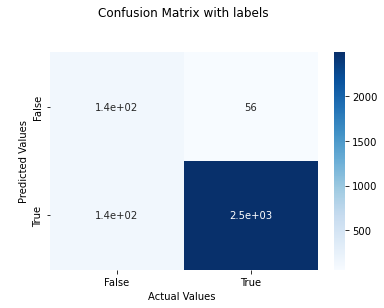

In [113]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ');

ax.yaxis.set_ticklabels(['False','True'])
ax.xaxis.set_ticklabels(['False','True'])

In [114]:
# Confussion Matix Values

TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

True Positive: 2495
True Negative: 141
False Positive: 139
False Negative: 56


In [115]:
# Common confusion matrix metrics

print("Confusion Matrix Metrics")
print()

Accuracy    = round(100*((TP+TN)/(TP+TN+FP+FN)),2)
Sensitivity = round(100*TP/(TP+FN),2)  # or Recall
Specificity = round(100*TN/(FP+TN),2)
PPV         = round(100*TP/(TP+FP),2)  # or Precision
NPV         = round(100*TN/(TN+FN),2)
FDR         = round(100*FP/(TP+FP),2)
FOR         = round(100*FN/(TN+FN),2) 

print("Accuracy:", Accuracy, "%")
print("Sensitivity:", Sensitivity, "%")
print("Specificity:", Specificity, "%")
print("Positive Predictive Value:", PPV, "%")
print("Negative Predictive Value:", NPV, "%")
print("False Discovery Rate:", FDR, "%")
print("False Omission Rate:", FOR, "%")


Confusion Matrix Metrics

Accuracy: 93.11 %
Sensitivity: 97.8 %
Specificity: 50.36 %
Positive Predictive Value: 94.72 %
Negative Predictive Value: 71.57 %
False Discovery Rate: 5.28 %
False Omission Rate: 28.43 %


In [116]:
# Precision, Recall and F1 results

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
#print(classification_report(y_test, pred_values))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59       280
           1       0.95      0.98      0.96      2551

    accuracy                           0.93      2831
   macro avg       0.83      0.74      0.78      2831
weighted avg       0.92      0.93      0.93      2831



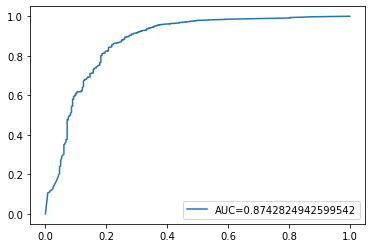

In [118]:
#plot ROC curve (check )

y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()


In [120]:
# Set true and false based on adjusted cut-off

threshold = 0.35
pred_values = np.where(log_regression.predict_proba(x_test)[:,1] > threshold, 1, 0)

df_compare = pd.DataFrame({'Orig_Model': y_pred, 'Revised_Model': pred_values})

df_compare


,Orig_Model,Revised_Model
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
2826,0,0
2827,1,1
2828,1,1
2829,1,1


In [121]:
# Distribution of y_pred and pred_values

pd.crosstab(df_compare['Revised_Model'], "Adjusted Threshold")

col_0,Adjusted Threshold
Revised_Model,
0,62
1,2769


In [122]:
# Confussion Matrix - Revised Threashold

confusion_matrix = pd.crosstab(pred_values, y_test, rownames=['Predicted'], colnames=['Actual'])

print (confusion_matrix)

Actual       0     1
Predicted           
0           48    14
1          232  2537


In [123]:
#not using APPDT right now
cols = [2,6,45,44,43,42,40,37]

x = df_college[df_college.columns[cols]]
y = df_college[df_college.columns[30]]

print(x)
print(y)

      1st_College_Semester_GPA  MILES_FROM_TTU  college_of_NU  college_of_IS  \
0                         2.00            0.98              0              0   
1                         2.67            0.98              0              0   
2                         2.45           15.60              0              0   
3                         2.60           79.95              0              0   
4                         1.50            2.23              0              0   
...                        ...             ...            ...            ...   
7087                      1.29            0.00              0              0   
7088                      0.38            0.00              0              0   
7089                      3.08            0.00              0              0   
7090                      2.50            0.00              0              1   
7091                      2.86            0.00              0              0   

      college_of_IP  college_of_FA  col

In [124]:
standardizer = MinMaxScaler()
x_standard = standardizer.fit_transform(x)

print(x_standard)

[[5.00000000e-01 3.03321056e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.67500000e-01 3.03321056e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.12500000e-01 4.82837599e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.70000000e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.25000000e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.15000000e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [125]:
x_train,x_test,y_train,y_test = train_test_split(x_standard, y, train_size=0.6, random_state=0)

print(x_train)

[[8.02500000e-01 2.02451329e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.82500000e-01 5.31121359e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 6.90210158e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.27500000e-01 2.98864094e-02 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.37500000e-01 1.98768145e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.75000000e-01 1.80940295e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [126]:
model = sm.Logit(y_train, x_train)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.220863
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Spring_1_Retention   No. Observations:                 4245
Model:                          Logit   Df Residuals:                     4237
Method:                           MLE   Df Model:                            7
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.3265
Time:                        20:48:58   Log-Likelihood:                -937.56
converged:                       True   LL-Null:                       -1392.0
Covariance Type:            nonrobust   LLR p-value:                5.702e-192
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.7616      0.156     30.476      0.000       4.455       5.068
x2            -3.4034      1.

In [128]:
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)


LogisticRegression()

In [129]:
y_pred = log_regression.predict(x_test)


In [130]:
# Compare actual versus predicted values

pred_prob = log_regression.predict_proba(x_test)[:,1]


df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': pred_prob})
df_compare


,Actual,Predicted,Probability
1091,1,1,0.881463
6229,1,0,0.385833
4747,1,1,0.941782
878,1,1,0.974808
4389,1,1,0.983819
...,...,...,...
890,0,0,0.252999
6903,1,1,0.942385
1709,1,1,0.873264
3019,1,1,0.969517


In [131]:
# Confussion Matrix - Original Model

confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])

print (confusion_matrix)

Actual       0     1
Predicted           
0          142    56
1          138  2495
